In [1]:
# Basic imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the cleaned dataset (interim version, before scaling)
df = pd.read_csv("../data/interim/StormEvents_cleaned.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (33904, 42)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,STATE,YEAR,MONTH_NAME,EVENT_TYPE,...,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DATA_SOURCE
0,202503,31,1104,202503,31,1106,14,2025,3,35,...,13,8875,2.0,13,8928,33.4757,-85.238,33.47570,-85.23800,0
1,202503,30,1552,202503,30,1555,34,2025,3,36,...,12,2815,1.0,5,2820,41.7900,-86.100,41.82000,-86.07000,0
2,202501,5,1800,202501,6,2227,59,2025,2,39,...,3,3212,1.0,3,3206,36.7106,-88.080,36.71405,-88.07145,0
3,202501,3,1300,202501,3,1900,32,2025,2,40,...,3,3212,1.0,3,3206,36.7106,-88.080,36.71405,-88.07145,0
4,202501,3,1300,202501,3,1900,32,2025,2,40,...,3,3212,1.0,3,3206,36.7106,-88.080,36.71405,-88.07145,0


In [3]:
# General info about columns and data types
df.info()

# Summary statistics for numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33904 entries, 0 to 33903
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     33904 non-null  int64  
 1   BEGIN_DAY           33904 non-null  int64  
 2   BEGIN_TIME          33904 non-null  int64  
 3   END_YEARMONTH       33904 non-null  int64  
 4   END_DAY             33904 non-null  int64  
 5   END_TIME            33904 non-null  int64  
 6   STATE               33904 non-null  int64  
 7   YEAR                33904 non-null  int64  
 8   MONTH_NAME          33904 non-null  int64  
 9   EVENT_TYPE          33904 non-null  int64  
 10  CZ_TYPE             33904 non-null  int64  
 11  CZ_NAME             33904 non-null  int64  
 12  WFO                 33904 non-null  int64  
 13  CZ_TIMEZONE         33904 non-null  int64  
 14  INJURIES_DIRECT     33904 non-null  int64  
 15  INJURIES_INDIRECT   33904 non-null  int64  
 16  DEAT

,count,mean,std,min,25%,50%,75%,max
BEGIN_YEARMONTH,33904.0,202503.160689,1.386288,202501.000000,202502.000000,202503.000000,202504.000000,2.025050e+05
BEGIN_DAY,33904.0,14.602466,8.539990,1.000000,6.000000,15.000000,20.000000,3.100000e+01
BEGIN_TIME,33904.0,1259.429743,687.914666,0.000000,700.000000,1434.000000,1800.000000,2.359000e+03
END_YEARMONTH,33904.0,202503.160689,1.386288,202501.000000,202502.000000,202503.000000,202504.000000,2.025050e+05
END_DAY,33904.0,15.799286,8.558284,1.000000,8.000000,16.000000,21.000000,3.100000e+01
END_TIME,33904.0,1370.083795,639.708493,0.000000,900.000000,1500.000000,1835.000000,2.359000e+03
STATE,33904.0,36.647564,18.740447,0.000000,21.000000,39.000000,55.000000,6.300000e+01
YEAR,33904.0,2025.000000,0.000000,2025.000000,2025.000000,2025.000000,2025.000000,2.025000e+03
MONTH_NAME,33904.0,2.065744,1.466499,0.000000,1.000000,2.000000,3.000000,4.000000e+00
EVENT_TYPE,33904.0,24.646531,11.808966,0.000000,16.000000,21.000000,35.000000,4.000000e+01


In [4]:
# Check missing values again (after cleaning, should be minimal)
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


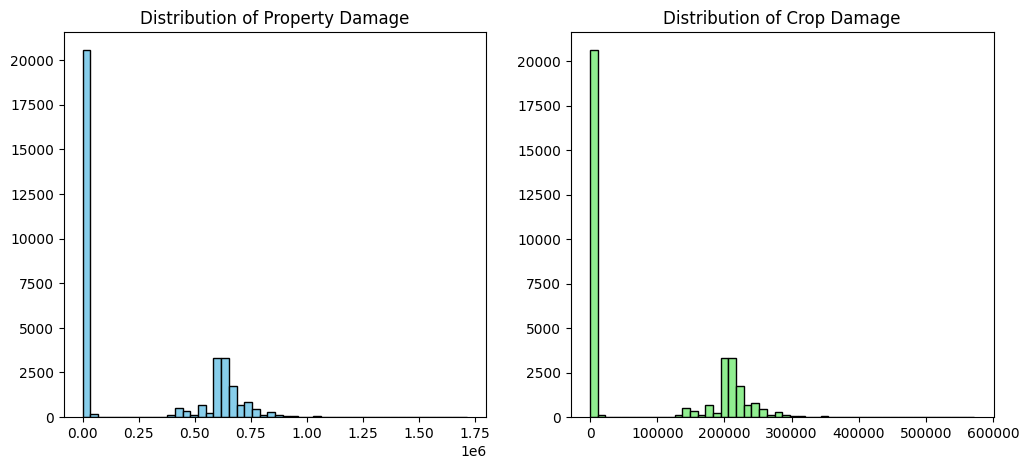

In [5]:
# Histograms for DAMAGE_PROPERTY and DAMAGE_CROPS
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["DAMAGE_PROPERTY"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Property Damage")

plt.subplot(1,2,2)
plt.hist(df["DAMAGE_CROPS"], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Crop Damage")

plt.show()


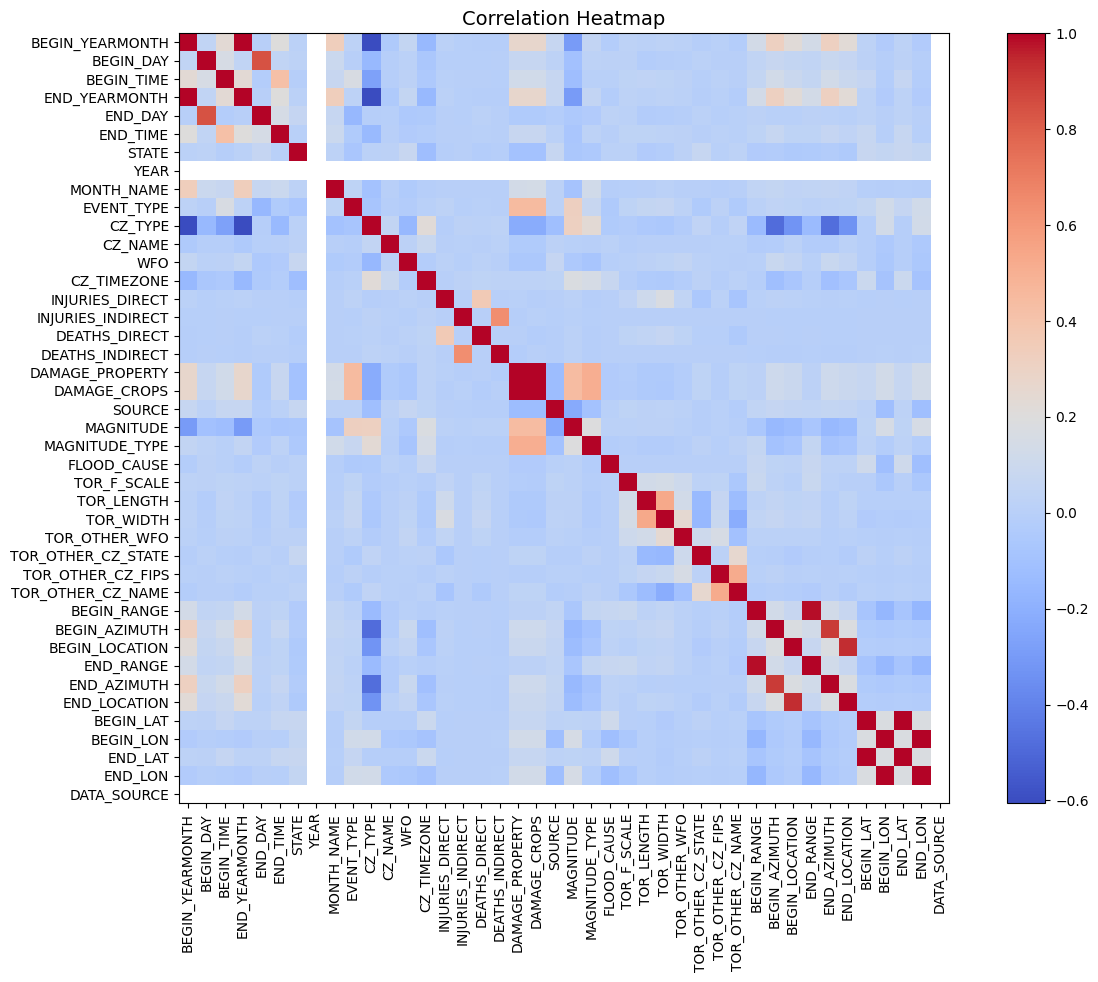

Top correlations with DAMAGE_PROPERTY:
 DAMAGE_PROPERTY    1.000000
DAMAGE_CROPS       0.997666
MAGNITUDE_TYPE     0.506076
EVENT_TYPE         0.445245
MAGNITUDE          0.438948
BEGIN_YEARMONTH    0.270734
END_YEARMONTH      0.270734
MONTH_NAME         0.140534
BEGIN_LON          0.130159
END_LON            0.129860
Name: DAMAGE_PROPERTY, dtype: float64

Top correlations with DAMAGE_CROPS:
 DAMAGE_CROPS       1.000000
DAMAGE_PROPERTY    0.997666
MAGNITUDE_TYPE     0.506065
EVENT_TYPE         0.444774
MAGNITUDE          0.439253
BEGIN_YEARMONTH    0.270793
END_YEARMONTH      0.270793
MONTH_NAME         0.141129
BEGIN_LON          0.130423
END_LON            0.130119
Name: DAMAGE_CROPS, dtype: float64


In [6]:
# Correlation matrix for numeric features (including targets)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Top correlated features with targets
print("Top correlations with DAMAGE_PROPERTY:\n", corr["DAMAGE_PROPERTY"].sort_values(ascending=False).head(10))
print("\nTop correlations with DAMAGE_CROPS:\n", corr["DAMAGE_CROPS"].sort_values(ascending=False).head(10))


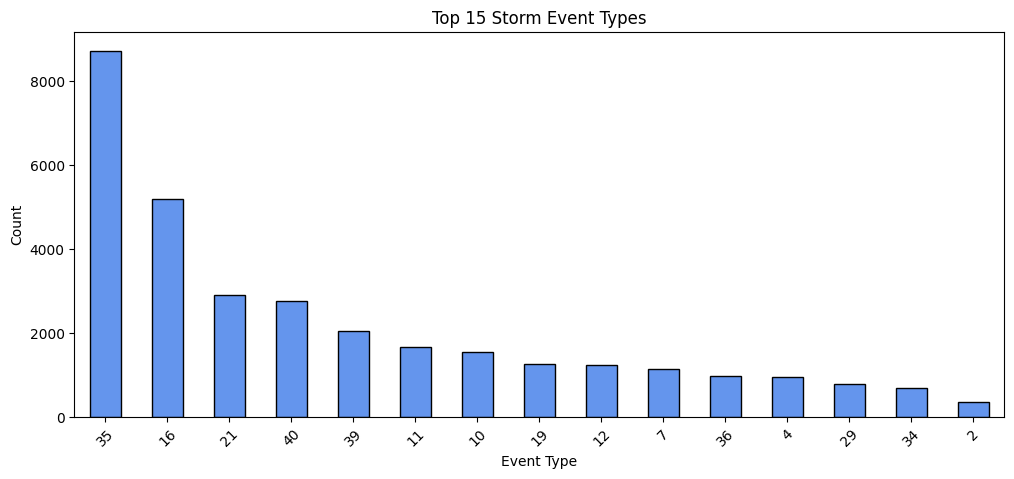

In [7]:
# Count of events by type
event_counts = df["EVENT_TYPE"].value_counts().head(15)

plt.figure(figsize=(12,5))
event_counts.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 15 Storm Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


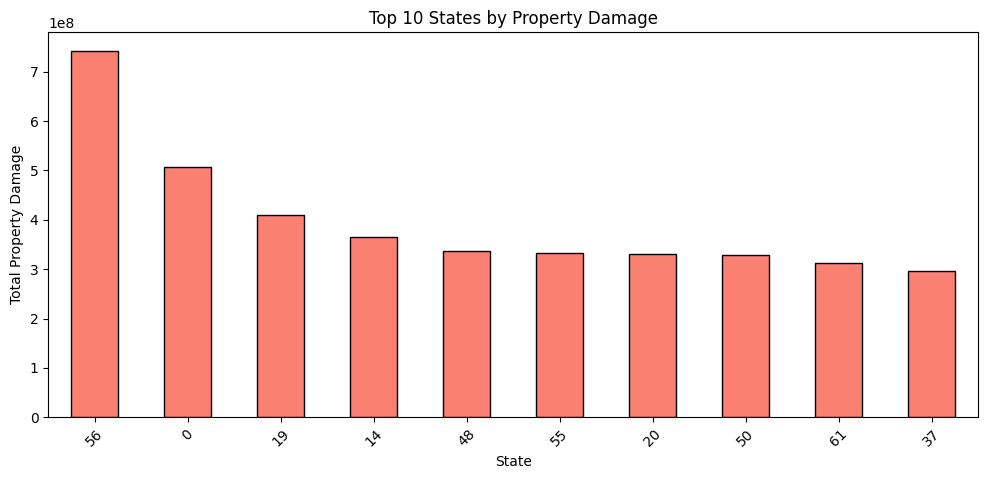

In [8]:
# Total property damage by state (top 10)
state_damage = df.groupby("STATE")["DAMAGE_PROPERTY"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
state_damage.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Top 10 States by Property Damage")
plt.xlabel("State")
plt.ylabel("Total Property Damage")
plt.xticks(rotation=45)
plt.show()


In [9]:
# This is a markdown/comment cell in the notebook:
# - Most storm events are concentrated in certain types (Thunderstorm Wind, Hail, Flood, Tornado).
# - Property damages tend to be higher than crop damages overall.
# - Correlation analysis shows magnitude and event type strongly relate to damages.
# - Temporal trends show spikes in certain years (likely due to major storms).
# - Certain states show consistently higher damages, highlighting geographic risk.


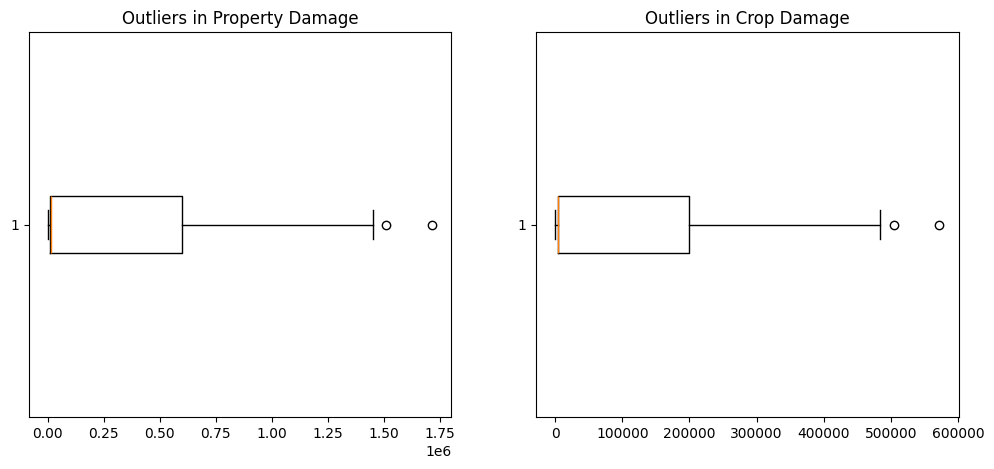

In [10]:
# Boxplots for DAMAGE_PROPERTY and DAMAGE_CROPS
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot(df["DAMAGE_PROPERTY"], vert=False)
plt.title("Outliers in Property Damage")

plt.subplot(1,2,2)
plt.boxplot(df["DAMAGE_CROPS"], vert=False)
plt.title("Outliers in Crop Damage")

plt.show()


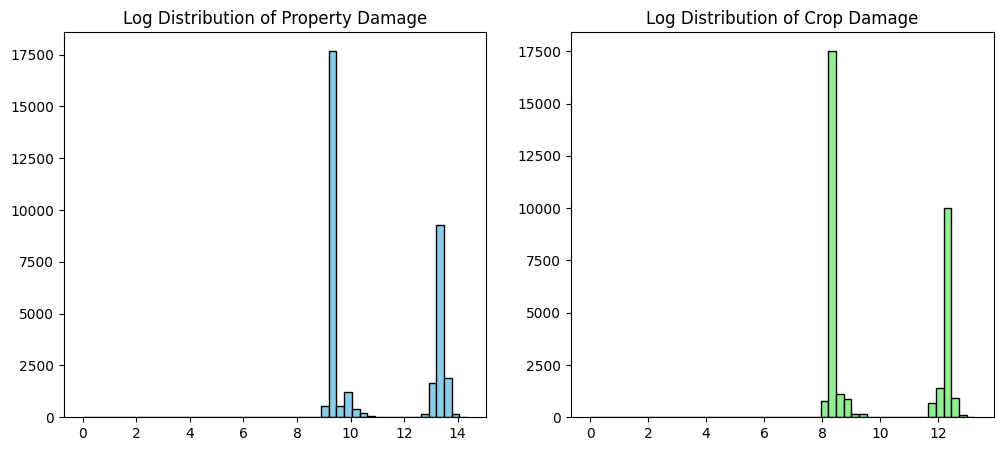

In [11]:
# Many damage values are skewed (a few huge disasters).
# Apply log-transform (add 1 to avoid log(0)) for visualization.
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(np.log1p(df["DAMAGE_PROPERTY"]), bins=50, color="skyblue", edgecolor="black")
plt.title("Log Distribution of Property Damage")

plt.subplot(1,2,2)
plt.hist(np.log1p(df["DAMAGE_CROPS"]), bins=50, color="lightgreen", edgecolor="black")
plt.title("Log Distribution of Crop Damage")

plt.show()


In [12]:
#**Outlier Analysis Observations**:
#- Both `DAMAGE_PROPERTY` and `DAMAGE_CROPS` are extremely right-skewed.
#- Boxplots show many points far outside the interquartile range (big disasters).
#- Log-transform reveals a clearer distribution, confirming that most events cause small damages while a few events cause massive losses.
#- These outliers are *real phenomena* (major hurricanes, floods, etc.), not data errors, so they should not be removed.
#- Instead, models may perform better if we apply log-transformations on targets during training.
